
<h1 style="text-align: center; font-size: 46px;">Dengue Analysis</h1>


<img src="https://osmiss.org.ar/news2/wp-content/uploads/2023/04/Dengue-1170x578.png">


In [112]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [113]:
dengue = pd.read_csv('dataset\\dengue.csv')
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


## Checking for null values

In [114]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

## Checking data types

In [115]:
dengue['Month'] = dengue['Month'].astype('category')
dengue['Year'] = dengue['Year'].astype('category')
dengue['Region'] = dengue['Region'].astype('category')

In [116]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Month          1020 non-null   category
 1   Year           1020 non-null   category
 2   Region         1020 non-null   category
 3   Dengue_Cases   1020 non-null   int64   
 4   Dengue_Deaths  1020 non-null   int64   
dtypes: category(3), int64(2)
memory usage: 20.3 KB


In [117]:
dengue.dtypes

Month            category
Year             category
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

<h1 style="text-align: center; font-size: 46px;">10 insights</h1>

## How many dengue cases occur per year?

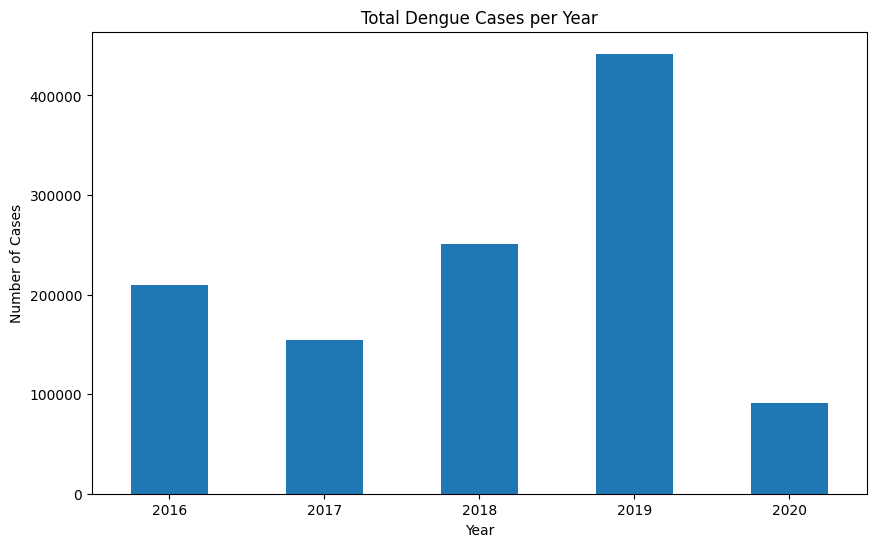

In [118]:
cases_per_year = dengue.groupby("Year")["Dengue_Cases"].sum()

cases_per_year.plot(kind="bar", figsize=(10,6))

plt.title("Total Dengue Cases per Year")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.xticks(rotation=0)
plt.show()


In [129]:
cases_per_year

Year
2016    209544
2017    154155
2018    250783
2019    441902
2020     91041
Name: Dengue_Cases, dtype: int64

<h1>Insights:</h1>
<ul>
    <li>The year 2019 recorded the highest number of dengue cases, with a total of 441,902 cases. It was followed by the year 2018 having a total of 250,783 cases.</li>
    <li>After that, it was followed by the year 2016 having a total of 209,544 dengue cases. Meanwhile, the year 2017 has 154,155  dengue cases </li>
    <li>Then we have the year 2020 for the lowest record, with a total of 91,041 dengue cases</li>
</ul>

## How many are the total deaths caused by dengue per year?

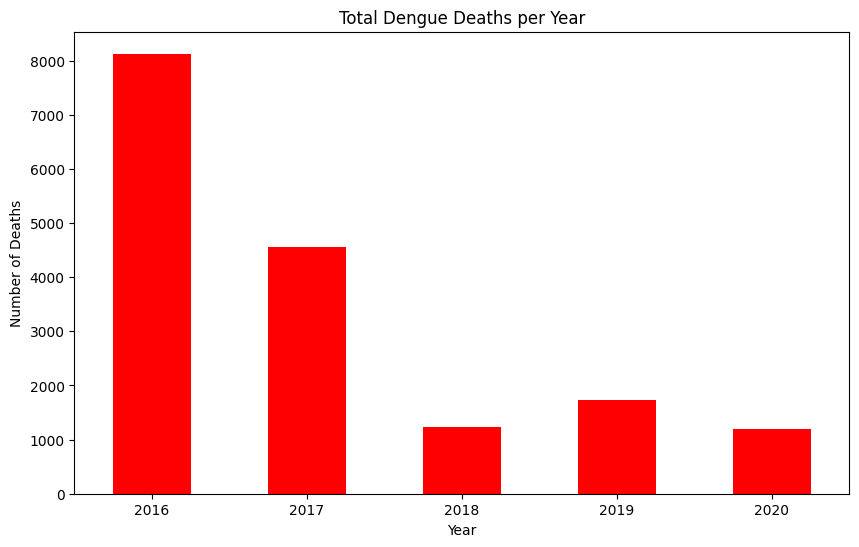

In [119]:
deaths_per_year = dengue.groupby("Year")["Dengue_Deaths"].sum()

deaths_per_year.plot(kind="bar", color="red", figsize=(10,6))

plt.title("Total Dengue Deaths per Year")
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.xticks(rotation=0)
plt.show()


In [130]:
deaths_per_year

Year
2016    8127
2017    4563
2018    1226
2019    1733
2020    1195
Name: Dengue_Deaths, dtype: int64

<h1>Insights:</h1>
<ul>
    <li>The year 2016 shows the highest number of death to occur, with a total of 8,127 deaths. It was followed by the year 2017 having a total of 4,563</li>
    <li>
        Meanwhile, the year 2020, 2019 and 2018 has the number of deaths to have occured ranging from 1,195 to 1,733.
    </li>
</ul>

# How many are the total dengue cases in each region?

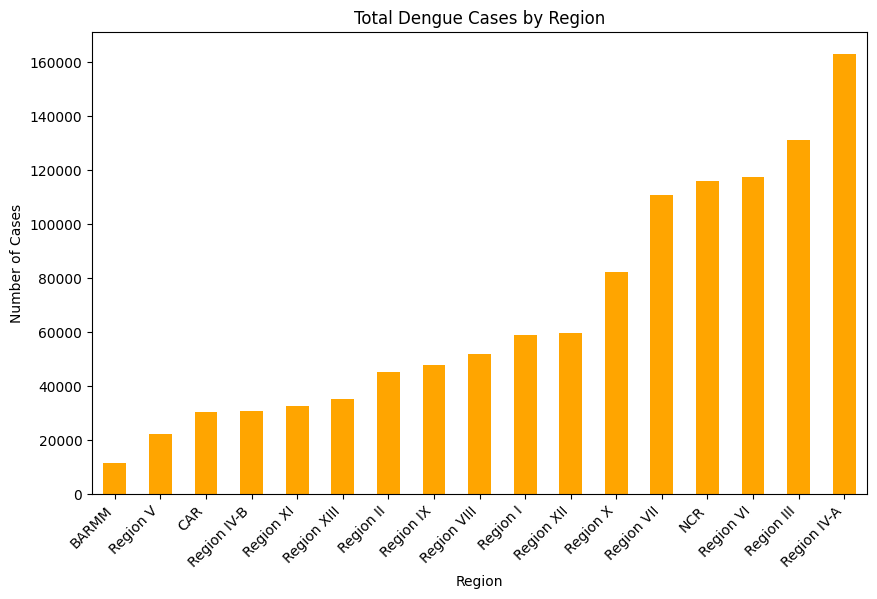

In [120]:
cases_by_region = dengue.groupby("Region")["Dengue_Cases"].sum().sort_values(ascending=True)

cases_by_region.plot(kind="bar", figsize=(10,6), color="orange")

plt.title("Total Dengue Cases by Region")
plt.xlabel("Region")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45, ha="right")
plt.show()


In [131]:
cases_by_region

Region
BARMM           11537
Region V        22167
CAR             30582
Region IV-B     30849
Region XI       32522
Region XIII     35293
Region II       45141
Region IX       47781
Region VIII     51983
Region I        59066
Region XII      59802
Region X        82437
Region VII     110683
NCR            115966
Region VI      117523
Region III     131064
Region IV-A    163029
Name: Dengue_Cases, dtype: int64

<h1>Insights:</h1>
<ul>
    <li>The graph shows that <b>Region IV-A</b> has the highest number of dengue cases, with a total of <b>163,029</b> cases. It is followed by <b>Region III</b> with <b>131,064</b> cases, and <b>NCR</b> with <b>115,966</b> cases. This indicates that <b>Luzon</b> recorded the highest number of dengue cases, as the top regions are all located there.</li>
    <li><b>Visayas</b> follows, with <b>Region VI</b> ranking third overall with <b>117,523</b> cases, and <b>Region VII</b> placing fifth. Despite having fewer regions, Visayas still reported a significant number of dengue cases.</li>
    <li><b>BARMM</b> recorded the lowest number of dengue cases among all regions, with only <b>11,537</b> cases.</li>
</ul>


# What is the trend of dengue cases throughout the months?

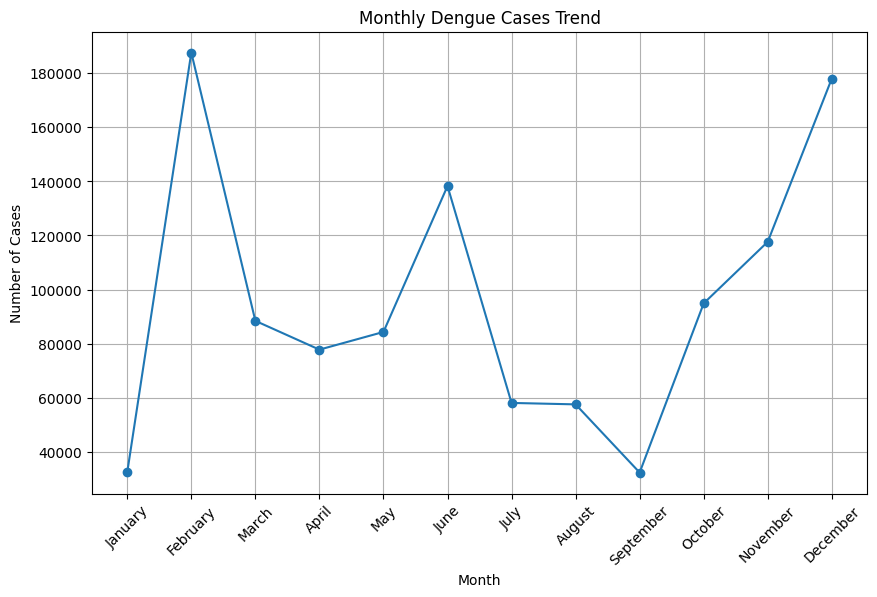

In [121]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

cases_by_month = dengue.groupby("Month")["Dengue_Cases"].sum()

cases_by_month.plot(kind="line", marker="o", figsize=(10,6))

plt.title("Monthly Dengue Cases Trend")
plt.xlabel("Month")
plt.ylabel("Number of Cases")
plt.grid(True)
plt.xticks(range(0,12), month_order, rotation=45)
plt.show()


<h1>Insights:</h1>
<ul>
    <li>The month of <b>February</b> shows the highest peak of dengue cases, followed by a decrease in <b>March</b> and <b>April</b>.</li>
    <li>From <b>May to June</b>, the number of cases starts to increase again, then drops from <b>July to September</b>, reaching the lowest point. After that, cases gradually rise again until <b>December</b>.</li>
</ul>


## Creating a new column to specify each region it belongs

In [122]:
# Define the mapping for each region
region_mapping = {
    "NCR": "Luzon",
    "CAR": "Luzon",
    "Region I": "Luzon",
    "Region II": "Luzon",
    "Region III": "Luzon",
    "Region IV-A": "Luzon",
    "Region IV-B": "Luzon",
    "Region V": "Luzon",
    
    "Region VI": "Visayas",
    "Region VII": "Visayas",
    "Region VIII": "Visayas",
    
    "Region IX": "Mindanao",
    "Region X": "Mindanao",
    "Region XI": "Mindanao",
    "Region XII": "Mindanao",
    "Region XIII": "Mindanao",
    "BARMM": "Mindanao"
}

# Create a new column
dengue["Island_Group"] = dengue["Region"].map(region_mapping)

In [123]:
dengue["Island_Group"].value_counts()

Island_Group
Luzon       480
Mindanao    360
Visayas     180
Name: count, dtype: int64

# What is the trend of dengue cases throughout the months per island group? How many are the total cases per island group?

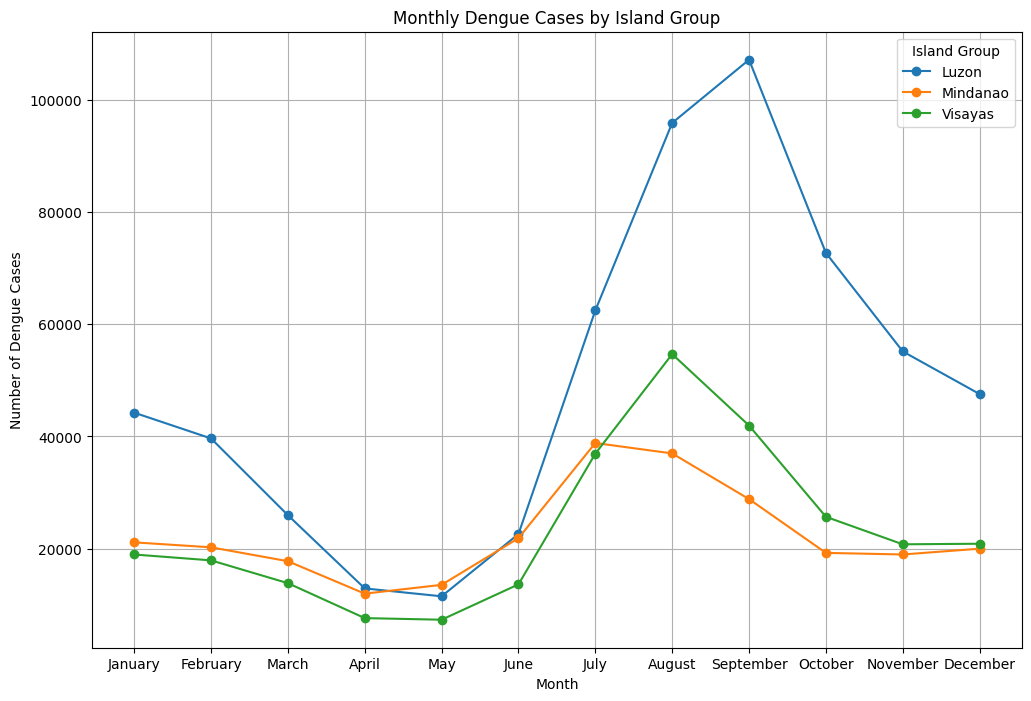

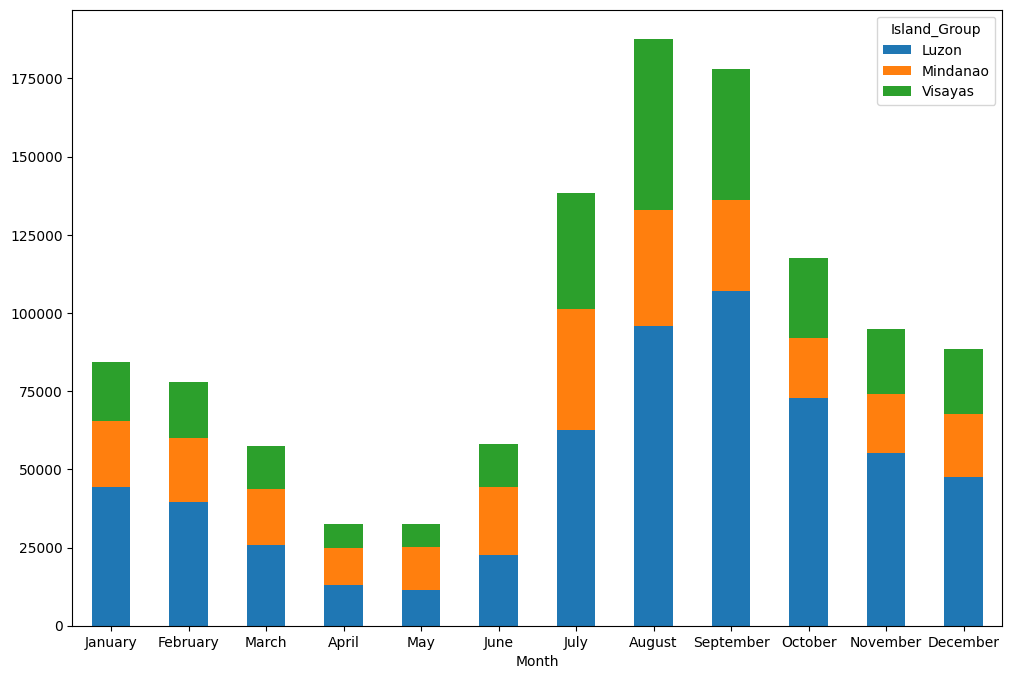

In [128]:
monthly_cases = dengue.groupby(['Month', 'Year', 'Island_Group'])['Dengue_Cases'].sum().reset_index()


month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

monthly_cases["Month"] = pd.Categorical(monthly_cases["Month"], categories=month_order, ordered=True)


result = monthly_cases.pivot_table(index="Month", columns="Island_Group", values="Dengue_Cases", aggfunc="sum")


result.plot(kind='line', marker='o', figsize=(12,8))
plt.title("Monthly Dengue Cases by Island Group")
plt.xlabel("Month")
plt.ylabel("Number of Dengue Cases")
plt.xticks(range(0,12), month_order)
plt.grid(True)
plt.legend(title="Island Group")
plt.show()

pivot.plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(12,8)
plt.xticks(rotation=0)
plt.show()

<h1>Insights:</h1>
<h1>Line graph</h1>
<ul>
    <li>Luzon consistently reports the highest number of cases, peaking around August to September.</li>
    <li>Visayas and Mindanao follow similar trends but with lower overall case counts.</li>
    <li>The lowest cases are observed during the dry months (April to May) across all island groups.</li>
</ul>
<h1>Bar graph</h1>
<ul>
    <li>The bar graph shows that Luzon has the most dengue cases overall, followed by Visayas and then Mindanao. This means dengue is more common in Luzon compared to the other island groups.</li>
</ul>


# The Number of Mortality rate in each Island Group?

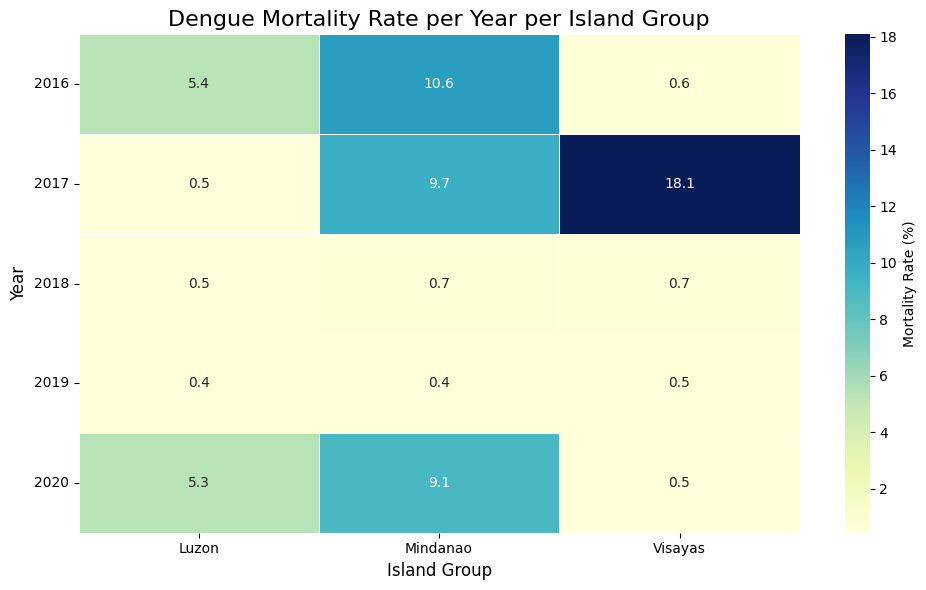

In [126]:
# Compute mortality rate
dengue['Mortality_Rate'] = (dengue['Dengue_Deaths'] / dengue['Dengue_Cases']) * 100

# Group by Year and Island Group instead of Region
heatmap_data = dengue.groupby(['Year', 'Island_Group'])['Mortality_Rate'].mean().unstack()

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Mortality Rate (%)'})
plt.title('Dengue Mortality Rate per Year per Island Group', fontsize=16)
plt.xlabel('Island Group', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


<h1>Insight:</h1>
<ul>
    <li>
        The heatmap shows that Mindanao consistently had the highest dengue mortality rates across multiple years, peaking at 10.6% in 2016 and 9.7% in 2017, followed closely by Visayas in 2017 (18.1%), which recorded the highest rate overall. In contrast, Luzon maintained relatively lower mortality rates throughout the observed period.
    </li>
</ul>